In [1]:
import pandas as pd
import datetime
import pickle
import plotly.express as px
import os.path
import csv
from pathlib import Path

In [2]:
r3k_csv = Path("./r3k_returns_pandas.csv")
r3k_df = pd.read_csv(r3k_csv, parse_dates=True, infer_datetime_format=True)
r3k_df.head()

,Date,Communication Services,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Utilities
0,1/31/1999,0.088633,0.045275,-0.026888,-0.056953,0.011041,-0.004394,0.007010,0.152047,-0.039150,-0.063299
1,2/28/1999,-0.027471,-0.003462,-0.039561,-0.033973,0.006529,-0.003032,-0.029693,-0.120986,-0.000627,-0.036748
2,3/31/1999,-0.011020,0.040829,-0.015490,0.151233,0.030270,0.023315,0.033120,0.086232,0.019981,-0.019142
3,4/30/1999,0.049122,0.046063,0.011206,0.157663,0.068831,-0.056520,0.082948,0.018787,0.235081,0.074431
4,5/31/1999,0.006260,-0.039077,0.011386,-0.023330,-0.044312,-0.019331,-0.027086,-0.009158,-0.059880,0.063941


In [3]:
annual_returns = pd.DataFrame(columns=['Annual Return','Sector','Year'])
annual_returns

,Annual Return,Sector,Year


In [4]:
top_csv = Path("./top_portfolio_test.csv")
top_df = pd.read_csv(top_csv)
top_df

,Annual Return,Sector,Year,Portfolio
0,0.1013,Consumer Discretionary,2007,Top
1,0.0963,Consumer Discretionary,2008,Top
2,0.0673,Consumer Discretionary,2009,Top
3,0.0699,Consumer Discretionary,2010,Top
4,0.1322,Consumer Discretionary,2011,Top
5,0.1034,Consumer Discretionary,2012,Top
6,0.0326,Consumer Discretionary,2013,Top
7,0.0439,Consumer Discretionary,2014,Top
8,0.0237,Consumer Discretionary,2015,Top
9,0.1238,Consumer Discretionary,2016,Top


In [5]:
r3k_df['Year'] = pd.DatetimeIndex(r3k_df['Date']).year
r3k_df = r3k_df.set_index('Date')
r3k_df.tail()

,Communication Services,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Utilities,Year
Date,,,,,,,,,,,
4/30/2019,0.063912,0.053800,0.024748,-0.001252,0.085841,-0.027031,0.046559,0.064470,0.031191,0.011862,2019
5/31/2019,-0.057190,-0.079088,-0.041575,-0.115715,-0.069890,-0.026263,-0.076827,-0.086961,-0.092439,-0.012461,2019
6/30/2019,0.040305,0.077355,0.051657,0.088266,0.065695,0.070831,0.083045,0.087332,0.119948,0.036577,2019
7/31/2019,0.035345,0.011088,0.024077,-0.025274,0.023993,-0.013283,0.007480,0.035808,-0.004436,-0.004758,2019
8/31/2019,-0.017846,-0.016263,0.016144,-0.087495,-0.049324,-0.011349,-0.030729,-0.021318,-0.036237,0.042514,2019


In [6]:
for year in range (2007,2019):
    year_df = r3k_df[r3k_df['Year']==year]
    for column in year_df:
        if column != 'Year':
            sector_df = year_df[column]
            cumulative_returns = (1 + sector_df).cumprod() - 1
            one_year = cumulative_returns.tail(1)
            one_year = pd.DataFrame(one_year)
            one_year = one_year.rename(columns={column:'Annual Return'})
            one_year['Sector'] = column
            one_year['Year'] = year
            annual_returns = pd.concat([annual_returns, one_year], axis="rows", sort=False)




In [7]:
annual_returns = annual_returns.reset_index(drop=True)
annual_returns.head()

,Annual Return,Sector,Year
0,0.100082,Communication Services,2007
1,-0.116690,Consumer Discretionary,2007
2,0.141322,Consumer Staples,2007
3,0.319712,Energy,2007
4,-0.178250,Financials,2007


In [8]:
annual_returns['Portfolio']='Index'
annual_returns.head()

,Annual Return,Sector,Year,Portfolio
0,0.100082,Communication Services,2007,Index
1,-0.116690,Consumer Discretionary,2007,Index
2,0.141322,Consumer Staples,2007,Index
3,0.319712,Energy,2007,Index
4,-0.178250,Financials,2007,Index


In [9]:
annual_returns = pd.concat([annual_returns, top_df], axis="rows", sort=False)
annual_returns = annual_returns.reset_index(drop=True)
annual_returns

,Annual Return,Sector,Year,Portfolio
0,0.100082,Communication Services,2007,Index
1,-0.116690,Consumer Discretionary,2007,Index
2,0.141322,Consumer Staples,2007,Index
3,0.319712,Energy,2007,Index
4,-0.178250,Financials,2007,Index
5,0.078668,Health Care,2007,Index
6,0.123290,Industrials,2007,Index
7,0.151293,Information Technology,2007,Index
8,0.263331,Materials,2007,Index
9,0.175534,Utilities,2007,Index


In [10]:
cd_df = annual_returns[annual_returns['Sector']=="Consumer Discretionary"]
cd_df

,Annual Return,Sector,Year,Portfolio
1,-0.116690,Consumer Discretionary,2007,Index
11,-0.386964,Consumer Discretionary,2008,Index
21,0.466376,Consumer Discretionary,2009,Index
31,0.301419,Consumer Discretionary,2010,Index
41,0.034449,Consumer Discretionary,2011,Index
51,0.247561,Consumer Discretionary,2012,Index
61,0.444878,Consumer Discretionary,2013,Index
71,0.091848,Consumer Discretionary,2014,Index
81,0.060373,Consumer Discretionary,2015,Index
91,0.070985,Consumer Discretionary,2016,Index


In [17]:
fig = px.bar(cd_df, x="Year", y="Annual Return", color="Portfolio", barmode="group")
fig

In [16]:
type(fig)

plotly.graph_objs._figure.Figure

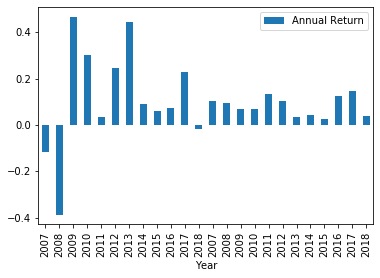

In [20]:
cd_df.plot(kind="bar",x="Year", y="Annual Return")